![title](yesbank_feature_banner.png)

# YES BANK DATATHON

## Machine Learning Challenge Round 3 - EDA

### Data Description 
The data given is of credit records of individuals with certain attributes.

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
train=pd.read_csv('Yes_Bank_Train.csv')
test=pd.read_csv('Yes_Bank_Test_int.csv')
train.info()

sub=pd.read_csv('sample_clusters.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
serial number       800 non-null int64
account_info        800 non-null object
duration_month      800 non-null int64
credit_history      800 non-null object
purpose             800 non-null object
credit_amount       800 non-null int64
savings_account     800 non-null object
employment_st       800 non-null object
poi                 800 non-null int64
personal_status     800 non-null object
gurantors           800 non-null object
resident_since      800 non-null int64
property_type       800 non-null object
age                 800 non-null int64
installment_type    800 non-null object
housing_type        800 non-null object
credits_no          800 non-null int64
job_type            800 non-null object
liables             800 non-null int64
telephone           800 non-null object
foreigner           800 non-null object
dtypes: int64(8), object(13)
memory usage: 131.3+ KB


In [44]:
train.head()

,serial number,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [45]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
serial number,800,NaN,NaN,NaN,400.5,231.084,1,200.75,400.5,600.25,800
account_info,800,4,A14,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_month,800,NaN,NaN,NaN,20.6513,12.1563,4,12,18,24,72
credit_history,800,5,A32,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,800,10,A43,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,800,NaN,NaN,NaN,3190.98,2732.67,250,1342.25,2281.5,3914.25,15945
savings_account,800,5,A61,476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_st,800,5,A73,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poi,800,NaN,NaN,NaN,2.96625,1.12881,1,2,3,4,4
personal_status,800,4,A93,437,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
serial number,200,NaN,NaN,NaN,100.5,57.8792,1,50.75,100.5,150.25,200
account_info,200,4,A14,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_month,200,NaN,NaN,NaN,21.91,11.6357,4,12,20,27.25,60
credit_history,200,5,A32,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,200,10,A43,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
savings_account,200,5,A61,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_st,200,5,A73,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poi,200,NaN,NaN,NaN,3,1.07974,1,2,3,4,4
personal_status,200,4,A93,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gurantors,200,3,A101,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most of them are Categorical value, lets have a view at the features and what they signify

a. **serial number** : unique identification key

b. **account_info :** Categorized details of existing accounts of the individuals. The balance of money in account provided is stated by this variable

* A11 signifies 0 (excluding 0) or lesser amount credited to current checking account. (Amounts       are in units of certain currency)
* A12 signifies greater than 0 (including 0) and lesser than 200 (excluding 200) units of currency
* A13 signifies amount greater than 200 (including 200) being recorded in the account
* A14 signifies no account details provided*

c. **duration_month** : Duration in months for which the credit is existing

d. **credit_history** : This categorical variable signifies the credit history of the individual who has taken the loan


* A30 signifies that no previous loans has been taken or all loans taken have been payed back.
* A31 signifies that all loans from the current bank has been payed off. Loan information of other banks are not available.
* A32 signifies loan exists but till now regular installments have been payed back in full amount.
* A33  signifies that significant delays have been seen in repayment of loan installments.
* A34 signifies other loans exist at the same bank. Irregular behaviour in repayment.*


e. **purpose**: This variable signifies why the loan was taken


* A40 signifies that the loan is taken to buy a new car
* A41 signifies that the loan was taken to buy a old car 
* A42 signifies that the loan is taken to buy furniture or equipment
* A43 signifies that the loan is taken to buy radio or TV
* A44 signifies that the loan is taken to buy domestic appliances
* A45 signifies that the loan is taken for repairing purposes
* A46 signifies that the loan is taken for education
* A47 signifies that the loan is taken for vacation
* A48 signifies that the loan is taken for re skilling
* A49 signifies that the loan is taken for business and establishment
* A410 signifies other purposes*


f. **credit_amount**: The numerical variable signifies the amount credited to the individual (in units of a certain currency)(**TARGET**)

g. **savings_account**: This variable signifies details of the amount present in savings account of the individual:

* A61 signifies that less than 100 units (excluding 100) of currency is present
* A62 signifies that greater than 100 units (including 100) and less than 500 (excluding 500) units of currency is present
* A63 signifies that greater than 500 (including 500) and less than 1000 (excluding 1000) units of currency is present.
* A64 signifies that greater than 1000 (including 1000) units of currency is present.
* A65 signifies that no savings account details is present on record*


h. **employment_s**: Catergorical variable that signifies the employment status of everyone who has been alloted loans

* A71 signifies that the individual is unemployed
* A72 signifies that the individual has been employed for less than a year
* A73 signifies that the individual has been employed for more than a year but less than four years
* A74 signifies that the individual has been employed more than four years but less than seven years
* A75 signifies that the individual has been employed for more than seven years*


i. **poi**: This numerical variable signifies what percentage of disposable income is spent on loan interest amount.

j. ***personal_status**: This categorical variable signifies the personal status of the individual

* A91 signifies that the individual is a separated or divorced male
* A92 signifies female individuals who are separated or divorced
* A93 signifies unmarried males
* A94 signifies married or widowed males
* A95 signifies single females*


k. **gurantors**: Categorical variable which signifies if any other individual is involved with an individual loan case

* A101 signifies that only a single individual is involved in the loan application
* A102 signifies that one or more co-applicant is present in the loan application
* A103 signifies that guarantor are present.*


l. **resident_since**: Numerical variable that signifies for how many years the applicant has been a resident

m. **property_type**: This qualitative variable defines the property holding information of the individual

* A121 signifies that the individual holds real estate property
* A122 signifies that the individual holds a building society savings agreement or life insurance
* A123 signifies that the individual holds cars or other properties
* A124 signifies that property information is not available*


n. **age**: Numerical variable that signifies age in number of years

o. **installment_type**: This variable signifies other installment types taken

* A141 signifies installment to bank
* A142 signifies installment to outlets or stores
* A143 signifies that no information is present*


p. **housing_type**: This is a categorical variable that signifies which type of housing does a applicant have.

* A151 signifies that the housing is on rent
* A152 signifies that the housing is owned by the applicant
* A153 signifies that no loan amount is present on the housing and there is no expense for the housing) *


q. **credits_no**: Numerical variable for number of credits taken by the person

r. **job_type**: Signifies the employment status of the person

* A171 signifies that the individual is unemployed or unskilled and is a non-resident
* A172 signifies that the individual is unskilled but is a resident
* A173 signifies that the individual is a skilled employee or official
* A174 signifies that the individual is involved in management or is self-employed or a highly qualified employee or officer*

s. **liables**: Signifies number of persons dependent on the applicant

t. **telephone**: Signifies if the individual has a telephone or not

* A191 signifies that no telephonic records are present
* A192 signifies that a telephone is registered with the customer’s name*


u. **foreigner**: Signifies if the individual is a foreigner or not (considering the country of residence of the bank)

* A201 signifies that the individual is a foreigner
* A202  signifies that the individual is a resident*

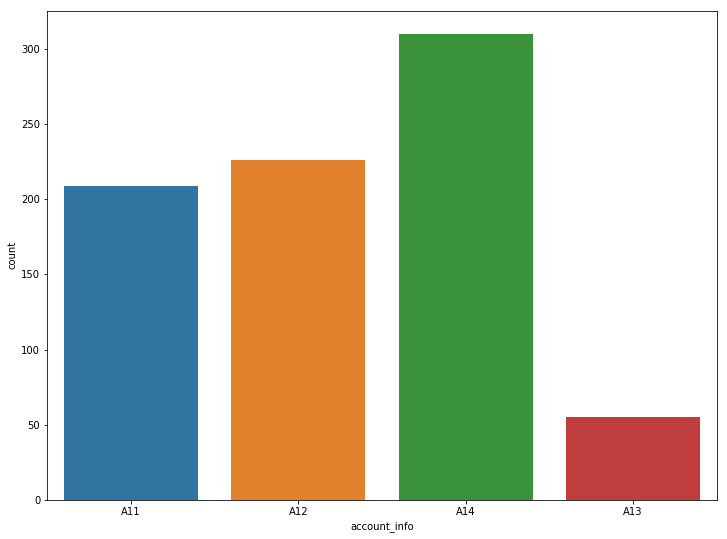

In [60]:
plt.figure(figsize=(12,9))
sns.countplot(train.account_info)

<Figure size 864x648 with 0 Axes>

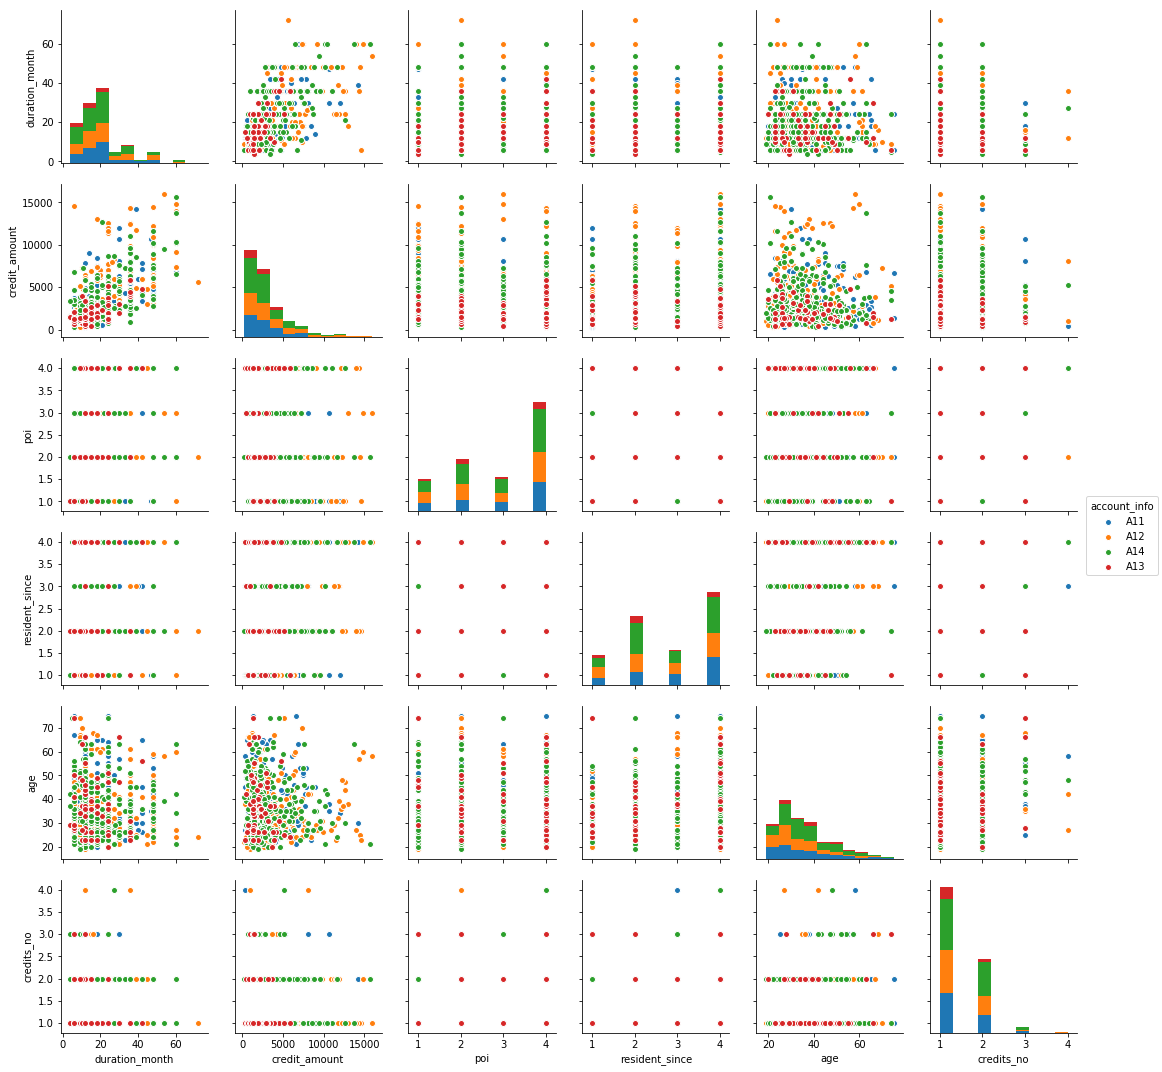

In [65]:
plt.figure(figsize=(12,9))
sns.pairplot(train.drop(['serial number','liables'],axis=1),hue='account_info')

<Figure size 864x648 with 0 Axes>

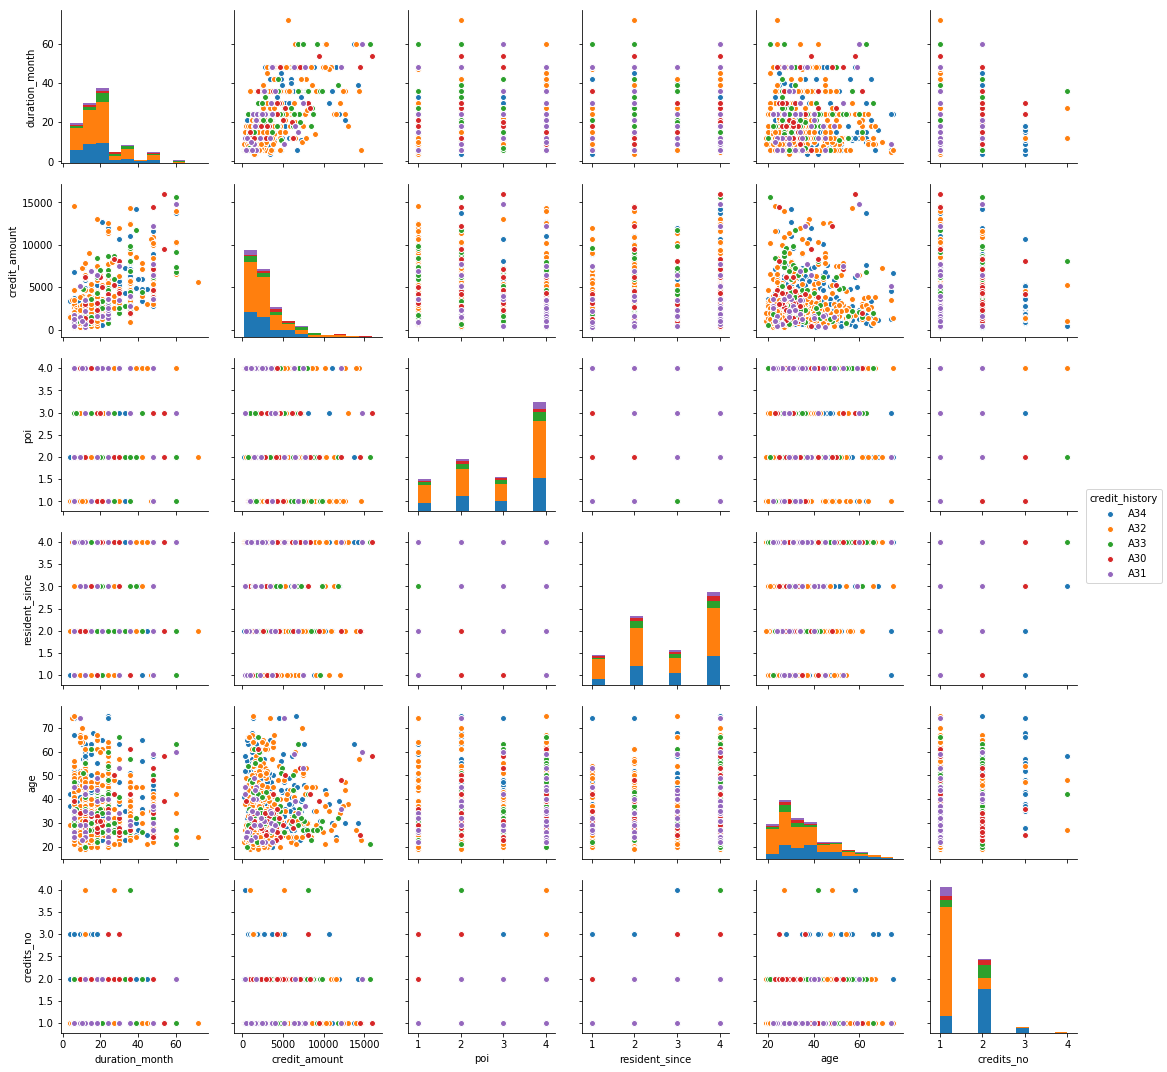

In [66]:
plt.figure(figsize=(12,9))
sns.pairplot(train.drop(['serial number','liables'],axis=1),hue='credit_history')

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x648 with 0 Axes>

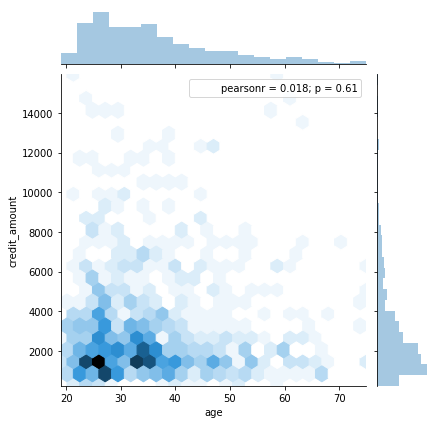

In [69]:
plt.figure(figsize=(12,9))
sns.jointplot(train.age,train.credit_amount,kind='hex')

C:\Users\Acer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


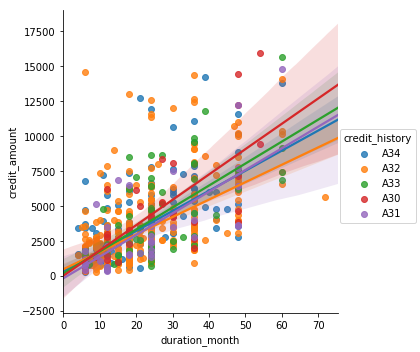

In [74]:

# sns.jointplot(train.poi,train.credit_amount,kind='scatter')
sns.lmplot('duration_month','credit_amount',train,hue='credit_history')

### One Hot Encoded

In [49]:
dftrain=pd.get_dummies(train,drop_first=True)
dftrain.head()

,serial number,duration_month,credit_amount,poi,resident_since,age,credits_no,liables,account_info_A12,account_info_A13,...,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,6,1169,4,4,67,2,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,2,48,5951,2,2,22,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,3,12,2096,2,3,49,1,2,0,0,...,0,0,1,1,0,1,0,0,0,0
3,4,42,7882,2,4,45,1,2,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,24,4870,3,4,53,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0


**Correlation**

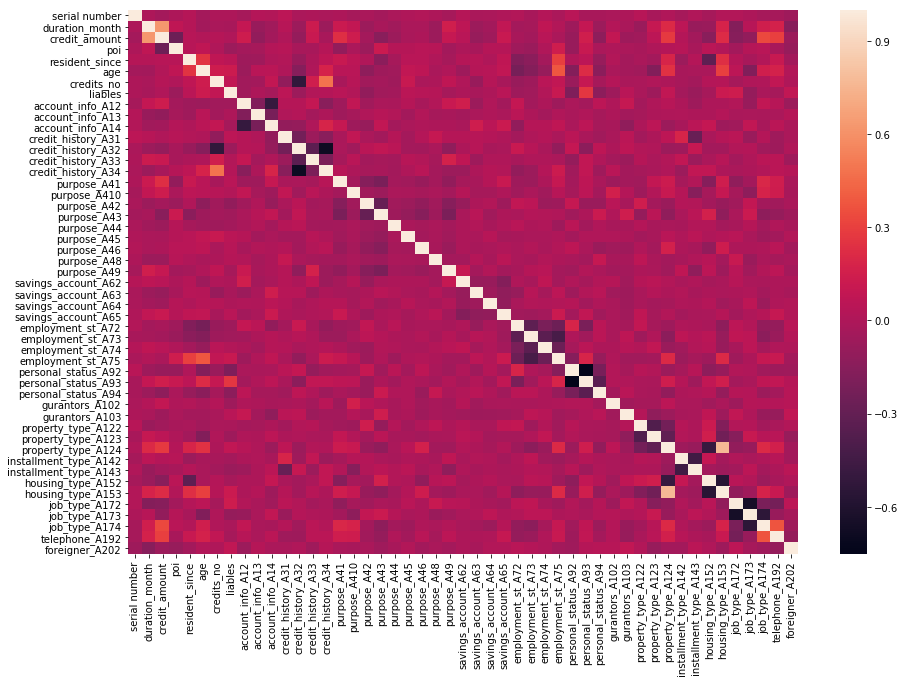

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(dftrain.corr())

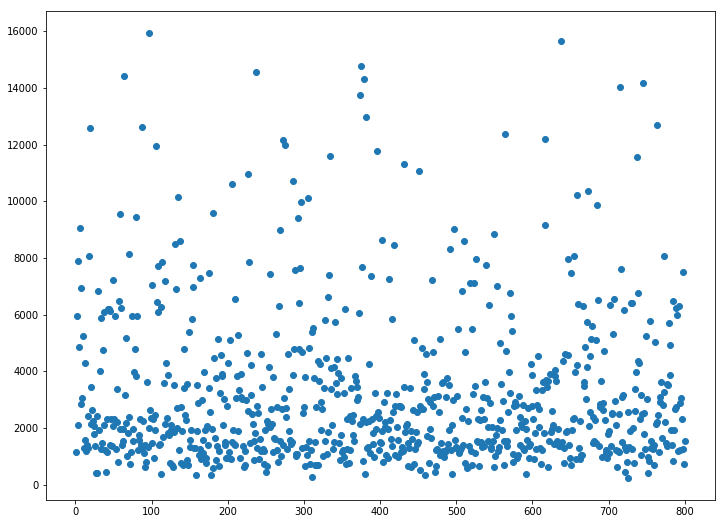

In [53]:
plt.figure(figsize=(12,9))
plt.scatter(dftrain['serial number'],dftrain.credit_amount)

**Lets have a try at train test split to see where we are at**

In [11]:
X,y=dftrain.drop(['serial number','credit_amount'],axis=1),dftrain.credit_amount

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1994)

![title](yesbank_feature_banner.png)



# YES BANK DATATHON

## Machine Learning Challenge Round 3 - Prediction

### Ensemble

Taking **RMSE** as the Eval Metric

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

rf=RandomForestRegressor(n_estimators=420)
rf.fit(X_train,y_train)
p=rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,p)))

1819.5808199916296


Feature Importances

In [28]:
col=pd.DataFrame({'col':X.columns,'imp':rf.feature_importances_}).sort_values('imp',ascending=False)
col

,col,imp
0,duration_month,0.429699
1,poi,0.104954
3,age,0.068629
44,job_type_A174,0.051236
6,account_info_A12,0.026986
45,telephone_A192,0.022448
2,resident_since,0.021336
25,savings_account_A65,0.019940
4,credits_no,0.015545
13,purpose_A41,0.014815


Taking top 45 values

In [29]:
main_col=col.col.values[:45]

Taking and Encoding Test Data as well

In [9]:
dftest=pd.get_dummies(test,drop_first=True)
dftest.head()

,serial number,duration_month,poi,resident_since,age,credits_no,liables,account_info_A12,account_info_A13,account_info_A14,...,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174,telephone_A192,foreigner_A202
0,1,24,4,4,54,2,2,0,0,1,...,1,0,1,0,1,0,1,0,0,0
1,2,18,3,4,48,2,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,20,1,4,24,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,4,12,4,4,35,2,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
4,5,12,1,2,24,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Using **Kfold**

In [30]:
X1=X[main_col]
dftest1=dftest[main_col]
from sklearn.metrics import mean_squared_error
err=[]
pdd=[]
from sklearn.model_selection import KFold
fold=KFold(n_splits=4,shuffle=True)
for train_index, test_index in fold.split(X1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf=RandomForestRegressor(n_estimators=420,max_features=10)
    rf.fit(X_train,y_train)
    err.append(np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))
    p=rf.predict(dftest1)
    pdd.append(p)


In [55]:
np.mean(err,axis=0)

1869.703079237097

In [31]:
pdd_mean=np.mean(pdd,axis=0)
pdd_mean

array([2550.19      , 2580.41142857, 3040.82761905, 1367.96095238,
       2685.80880952, 5925.00809524, 1251.09571429, 1287.47952381,
       9067.57285714, 2205.49190476, 1770.2202381 , 1353.31714286,
       4940.62686508, 5107.14619048, 5083.47142857, 5280.52348073,
       2295.58142857, 2546.04666667, 6047.34852041, 1452.5347619 ,
       1663.99095238, 1609.43452381, 4350.68142857, 1182.83190476,
       3249.11805556, 2115.36603175, 3572.1052381 , 3325.54714286,
       5125.16809524, 6832.09333333, 3052.03214286, 2021.32      ,
       6319.34507937, 3490.95047619, 1965.92047619, 1314.48      ,
       1494.49666667, 2067.6652381 , 2809.04488095, 1793.06119048,
       3970.77030612, 4076.56357143, 1542.53619048, 2800.59297619,
       2422.96511905, 3775.04380952, 3260.2447619 , 1687.22238095,
       2050.6352381 , 1389.72952381, 1834.47833333, 3630.70904762,
       2512.75380952, 2286.95845238, 5892.67253968, 2089.42964286,
       1612.58571429, 3454.12916667, 2183.57880952, 2531.04952

### Neural Network

In [32]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp=MLPRegressor(hidden_layer_sizes=(120,30,), activation="relu", max_iter=500, random_state=8,solver='adam')
mlp.fit(X_train,y_train)
p=mlp.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,p)))

1680.675862689182


In [33]:
mlp.fit(X,y)
pred=mlp.predict(dftest.drop('serial number',axis=1))

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
pred

array([ 2986.39319973,  1969.27952734,  3219.62400333,  1220.17047393,
        2908.36423851,  5807.10173662,   659.60292868,  1668.12996494,
       10511.4080946 ,  2772.22851608,  1260.25239594,   -38.58489954,
        5612.62272798,  5468.68673499,  6281.3761983 ,  5349.66241964,
        1120.4418823 ,  2120.34821343,  7155.46459117,   540.10615439,
        1383.84834613,   367.01318184,  4688.33224561,   481.86561784,
        4455.74451801,  1670.37955561,  3312.53724271,  2997.85815201,
        6013.98716278,  8338.45043225,  3095.57952718,  1928.46276201,
        6462.34258905,  4000.60250421,  1368.92574233,  1226.42624037,
         910.56120671,  1666.14190302,  3561.53985434,  1989.56755235,
        3915.28453672,  3112.69295769,  1353.67936405,  2988.00072432,
        2571.81479301,  5077.52338387,  3876.93056675,  1709.64585522,
        1207.89864186,   622.38547996,  1295.92916545,  5245.57207013,
        2547.44379091,  2447.58208094,  6060.79903218,  2277.89976779,
      

Taking Avg

In [56]:
main_p=(pdd_mean+pred)/2

In [57]:
sub=pd.DataFrame({'serial number':test['serial number'],'credit_amount':main_p})
sub.head()

,serial number,credit_amount
0,1,2768.291600
1,2,2274.845478
2,3,3130.225811
3,4,1294.065713
4,5,2797.086524


In [41]:
sub.to_csv('stack_main.csv',index=False)